In [1]:
import pandas as pd

# تحميل البيانات من ملف CSV
df = pd.read_csv('fpl_data.csv')

# إضافة عمود للمركز بناءً على 'element_type'
df['position'] = df['element_type'].map({
    1: 'Goalkeeper',
    2: 'Defender',
    3: 'Midfielder',
    4: 'Forward'
})




In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# تحميل البيانات من ملف CSV
df = pd.read_csv('fpl_data.csv')

# إضافة عمود للمركز بناءً على 'element_type'
df['position'] = df['element_type'].map({
    1: 'Goalkeeper',
    2: 'Defender',
    3: 'Midfielder',
    4: 'Forward'
})

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655 entries, 0 to 654
Data columns (total 90 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   chance_of_playing_next_round          208 non-null    float64
 1   chance_of_playing_this_round          192 non-null    float64
 2   code                                  655 non-null    int64  
 3   cost_change_event                     655 non-null    int64  
 4   cost_change_event_fall                655 non-null    int64  
 5   cost_change_start                     655 non-null    int64  
 6   cost_change_start_fall                655 non-null    int64  
 7   dreamteam_count                       655 non-null    int64  
 8   element_type                          655 non-null    int64  
 9   ep_next                               655 non-null    float64
 10  ep_this                               655 non-null    float64
 11  event_points       

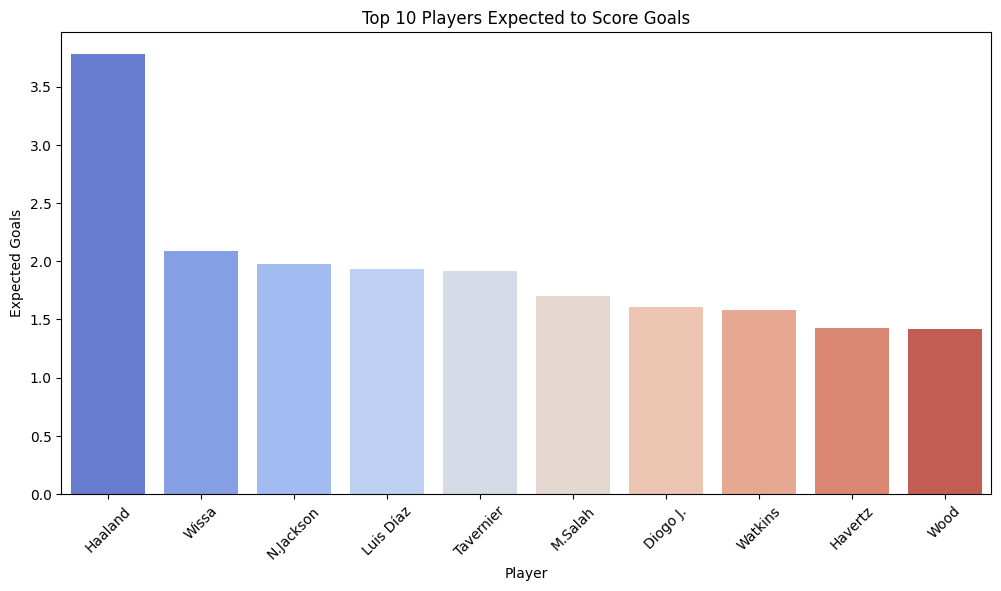

In [7]:
# 1. أفضل 10 لاعبين متوقعين لتسجيل الأهداف
top_scorers = df.sort_values(by='expected_goals', ascending=False).head(10)

# تصور أفضل 10 لاعبين متوقعين لتسجيل الأهداف
plt.figure(figsize=(12, 6))
sns.barplot(x='web_name', y='expected_goals',hue='web_name', data=top_scorers, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Top 10 Players Expected to Score Goals')
plt.xlabel('Player')
plt.ylabel('Expected Goals')
plt.show()

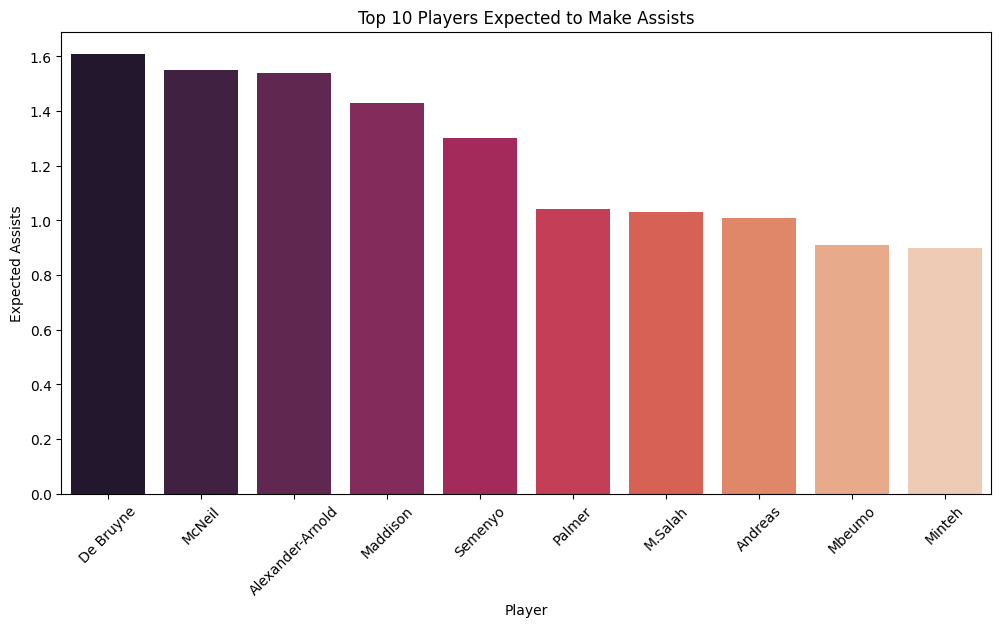

In [9]:
# 2. أفضل 10 لاعبين متوقعين لتحقيق الأسيستات
top_assisters = df.sort_values(by='expected_assists', ascending=False).head(10)

# تصور أفضل 10 لاعبين متوقعين لتحقيق الأسيستات
plt.figure(figsize=(12, 6))
# تعيين hue إلى اسم اللاعب أو الفريق
sns.barplot(x='web_name', y='expected_assists', hue='web_name', data=top_assisters, palette='rocket', legend=False)
plt.xticks(rotation=45)
plt.title('Top 10 Players Expected to Make Assists')
plt.xlabel('Player')
plt.ylabel('Expected Assists')
plt.show()

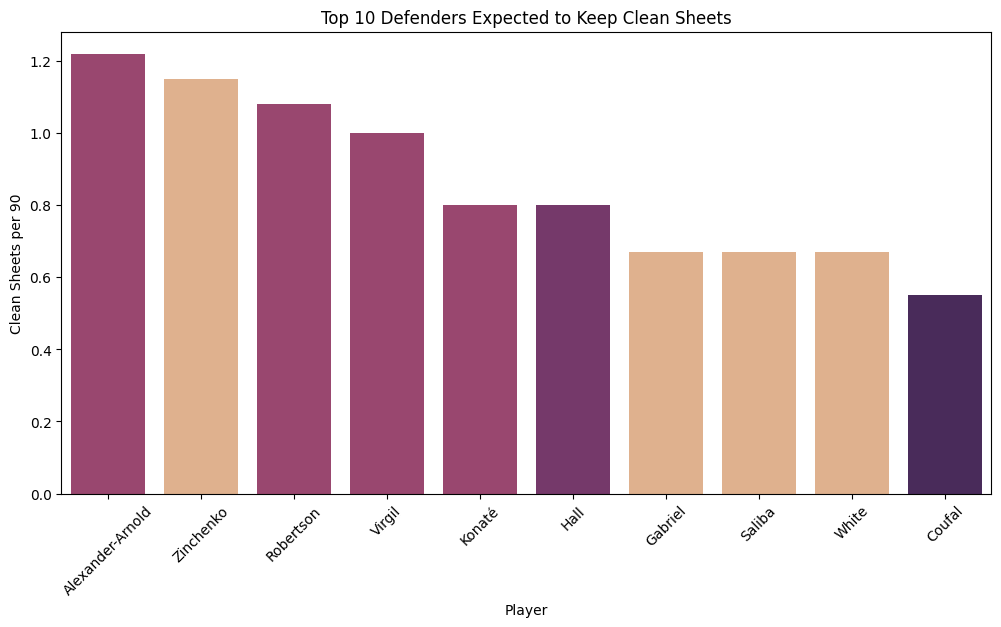

In [18]:
# 3. أفضل 10 مدافعين بناءً على 'clean_sheets_per_90'
defenders = df[df['position'] == 'Defender']
top_defenders = defenders.sort_values(by='clean_sheets_per_90', ascending=False).head(10)

# تصور أفضل 10 مدافعين متوقعين لتحقيق 'clean_sheets'
plt.figure(figsize=(12, 6))
sns.barplot(x='web_name', y='clean_sheets_per_90', hue='team', data=top_defenders, palette='flare', legend=False)
plt.xticks(rotation=45)
plt.title('Top 10 Defenders Expected to Keep Clean Sheets')
plt.xlabel('Player')
plt.ylabel('Clean Sheets per 90')
plt.show()

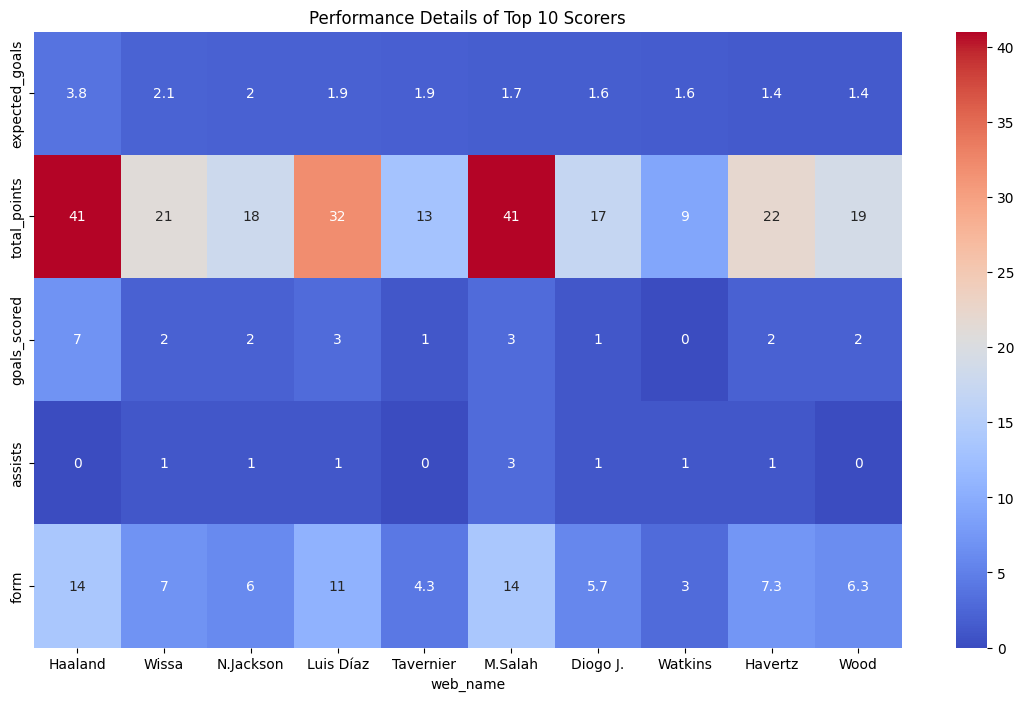

In [22]:
# 4. تفاصيل الأداء لأعلى 10 هدافين
top_scorers_details = df.sort_values(by='expected_goals', ascending=False).head(10)

# تصور تفاصيل الأداء لأعلى 10 هدافين
plt.figure(figsize=(14, 8))
sns.heatmap(top_scorers_details[['web_name', 'expected_goals', 'total_points', 'goals_scored', 'assists', 'form']].set_index('web_name').T, annot=True, cmap='coolwarm')
plt.title('Performance Details of Top 10 Scorers')
plt.show()

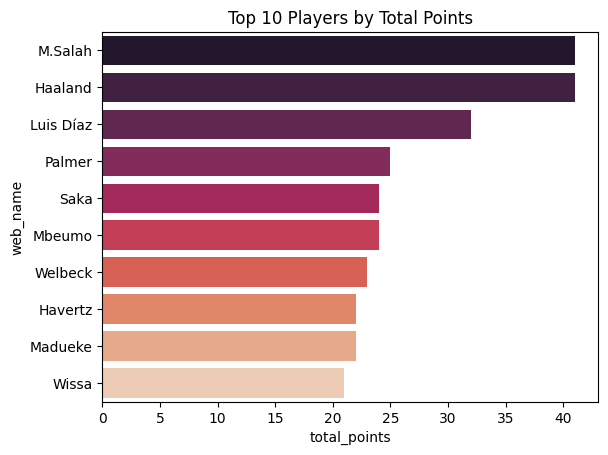

In [28]:
import warnings
warnings.filterwarnings("ignore")
top_players = df.nlargest(10, 'total_points')
sns.barplot(x='total_points', y='web_name', data=top_players, palette='rocket')
plt.title('Top 10 Players by Total Points')
plt.show()


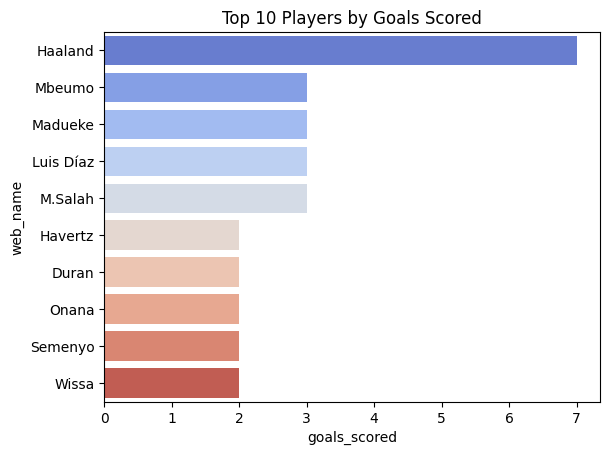

In [80]:
top_scorers = df.nlargest(10, 'goals_scored')
sns.barplot(x='goals_scored', y='web_name', data=top_scorers, palette='coolwarm')
plt.title('Top 10 Players by Goals Scored')
plt.show()


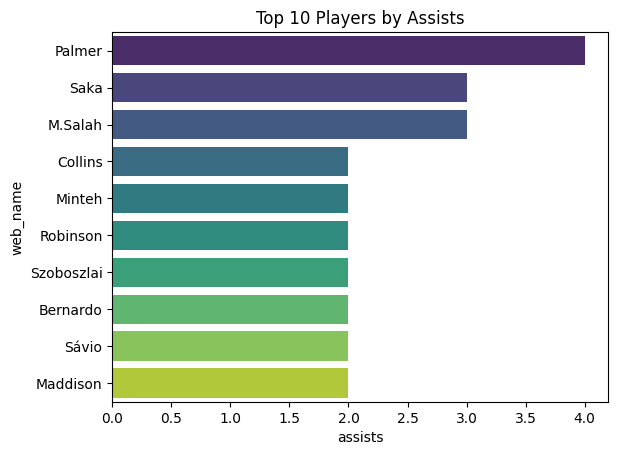

In [82]:
top_assisters = df.nlargest(10, 'assists')
sns.barplot(x='assists', y='web_name', data=top_assisters, palette='viridis')
plt.title('Top 10 Players by Assists')
plt.show()


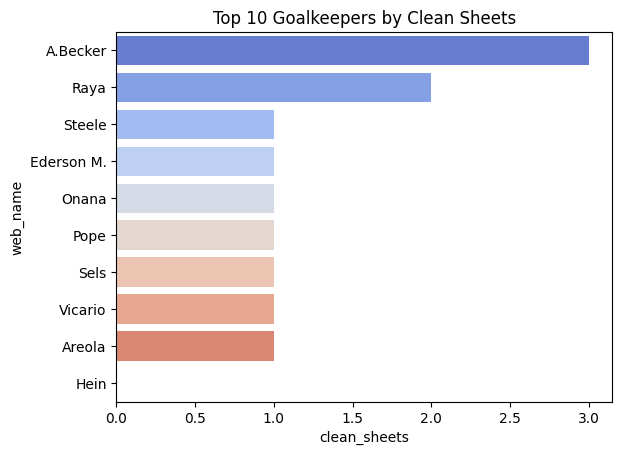

In [88]:
top_goalkeepers = df[df['position'] == 'Goalkeeper'].nlargest(10, 'clean_sheets')
sns.barplot(x='clean_sheets', y='web_name', data=top_goalkeepers, palette='coolwarm')
plt.title('Top 10 Goalkeepers by Clean Sheets')
plt.show()


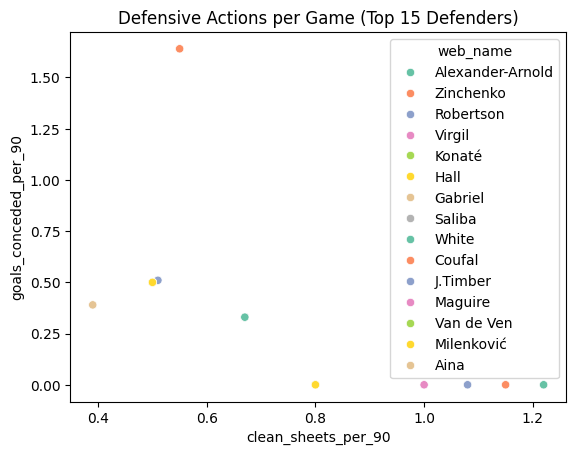

In [96]:
# عدد مرات تحقيق "شباك نظيف" لكل 90 دقيقة لعب
# Step 1: Select the first 15 players (or adjust selection logic as needed)
top_15_defenders = df[df['position'] == 'Defender'].sort_values(by='clean_sheets_per_90', ascending=False).head(15)

# Step 2: Create the scatter plot
sns.scatterplot(x='clean_sheets_per_90', y='goals_conceded_per_90', hue='web_name', data=top_15_defenders, palette='Set2')

# Step 3: Set the title and display the plot
plt.title('Defensive Actions per Game (Top 15 Defenders)')
plt.show()

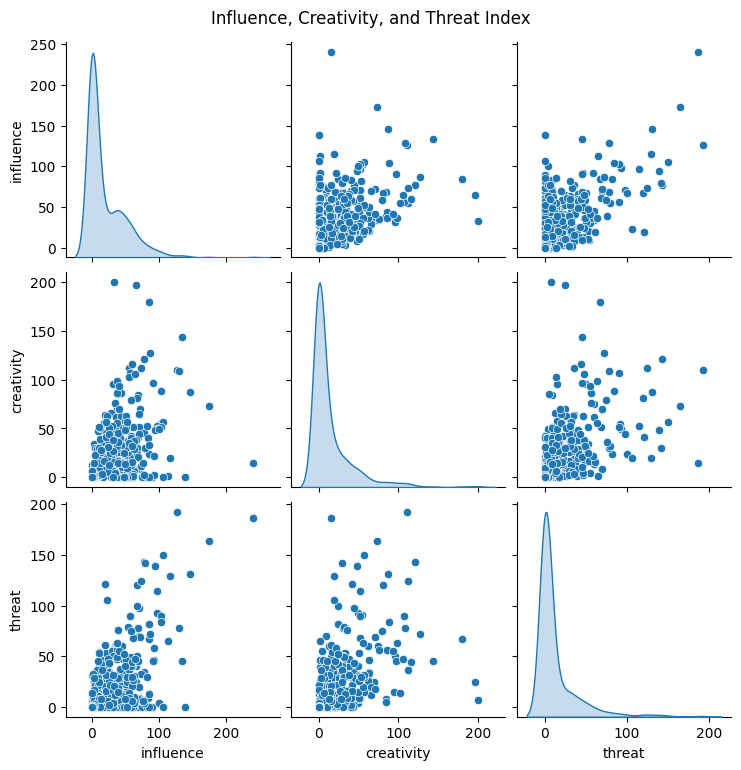

In [110]:
sns.pairplot(df[['influence', 'creativity', 'threat']], diag_kind='kde', palette='Dark2')
plt.suptitle('Influence, Creativity, and Threat Index', y=1.02)
plt.show()


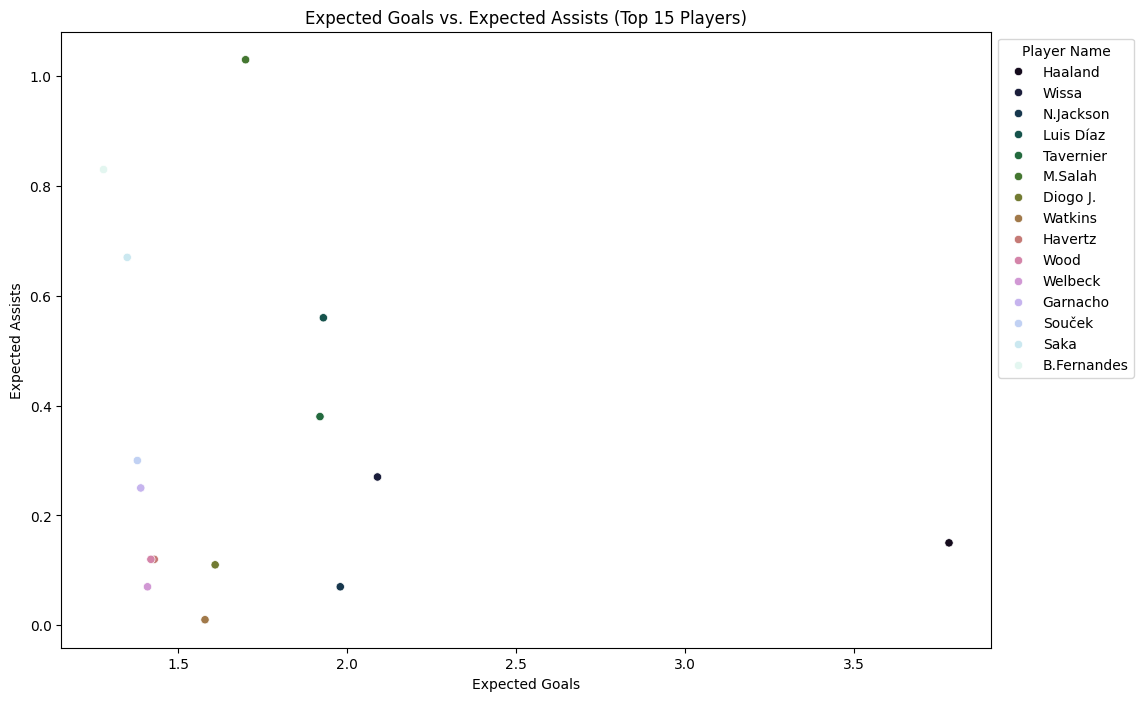

In [132]:
# الخطوة 1: اختيار أول 15 لاعب بناءً على معيار معين، مثل أعلى `expected_goals`
top_15_players = df.sort_values(by='expected_goals', ascending=False).head(15)

# الخطوة 2: إنشاء الرسم البياني
plt.figure(figsize=(12, 8))
sns.scatterplot(x='expected_goals', y='expected_assists', hue='web_name', data=top_15_players, palette='cubehelix')

# الخطوة 3: تخصيص العنوان وعرض الرسم البياني
plt.title('Expected Goals vs. Expected Assists (Top 15 Players)')
plt.xlabel('Expected Goals')
plt.ylabel('Expected Assists')
plt.legend(title='Player Name', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

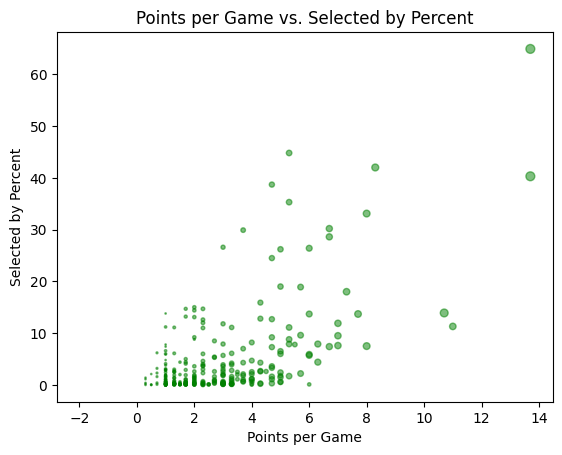

In [134]:
plt.scatter(df['points_per_game'], df['selected_by_percent'], s=df['total_points'], alpha=0.5, c='g')
plt.title('Points per Game vs. Selected by Percent')
plt.xlabel('Points per Game')
plt.ylabel('Selected by Percent')
plt.show()


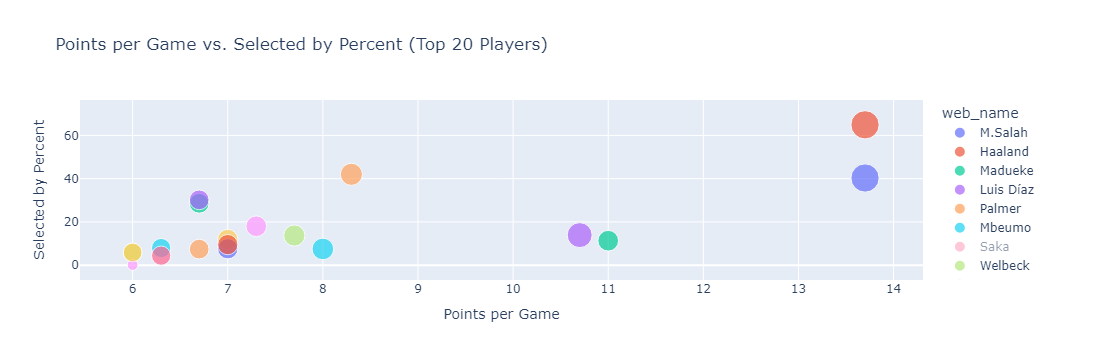

In [147]:
import plotly.express as px

# الخطوة 1: اختيار أول 20 لاعب بناءً على معيار معين
top_20_players = df.sort_values(by='points_per_game', ascending=False).head(20)

# الخطوة 2: إنشاء الرسم البياني التفاعلي
fig = px.scatter(top_20_players, x='points_per_game', y='selected_by_percent', 
                 size='total_points', color='web_name', hover_name='web_name', 
                 title='Points per Game vs. Selected by Percent (Top 20 Players)', 
                 labels={'points_per_game': 'Points per Game', 'selected_by_percent': 'Selected by Percent'})

# عرض الرسم البياني
fig.show()

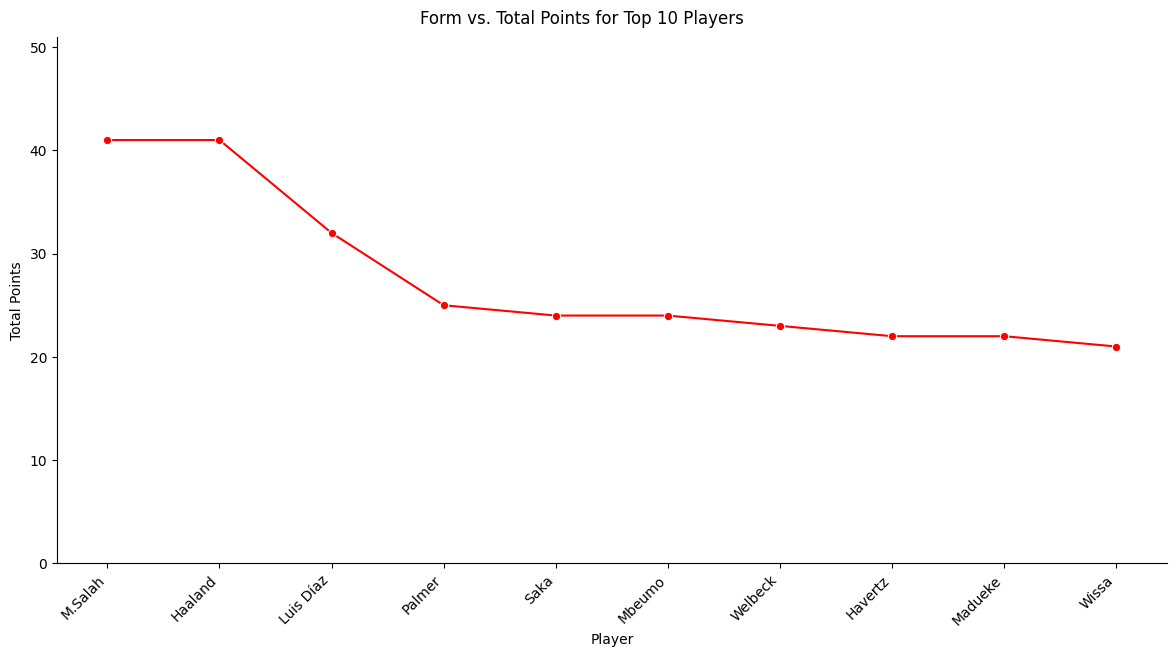

In [157]:
# اختيار أفضل 10 لاعبين بناءً على 'form'
top_form_players = df.nlargest(10, 'form')

# إنشاء رسم بياني باستخدام FacetGrid
g = sns.FacetGrid(top_form_players, height=6, aspect=2)

# إضافة نوع الرسم البياني إلى اللوحة
g.map(sns.lineplot, 'web_name', 'total_points', marker='o', color='red')

# تخصيص العنوان
g.set_axis_labels('Player', 'Total Points')
g.set_titles('Form vs. Total Points for Top 10 Players')
g.fig.suptitle('Form vs. Total Points for Top 10 Players', y=1.02)

# ضبط حجم الخط للعناوين والمحاور
g.set_xticklabels(rotation=45, ha='right')
g.set(ylim=(0, top_form_players['total_points'].max() + 10))  # ضبط نطاق المحور Y

# عرض الرسم البياني
plt.show()

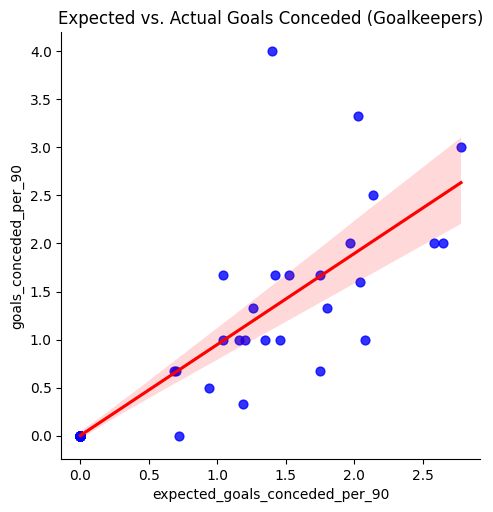

In [161]:
sns.lmplot(x='expected_goals_conceded_per_90', y='goals_conceded_per_90', data=df[df['position'] == 'Goalkeeper'], line_kws={'color': 'red'}, scatter_kws={'s': 40, 'color': 'blue'})
plt.title('Expected vs. Actual Goals Conceded (Goalkeepers)')
plt.show()


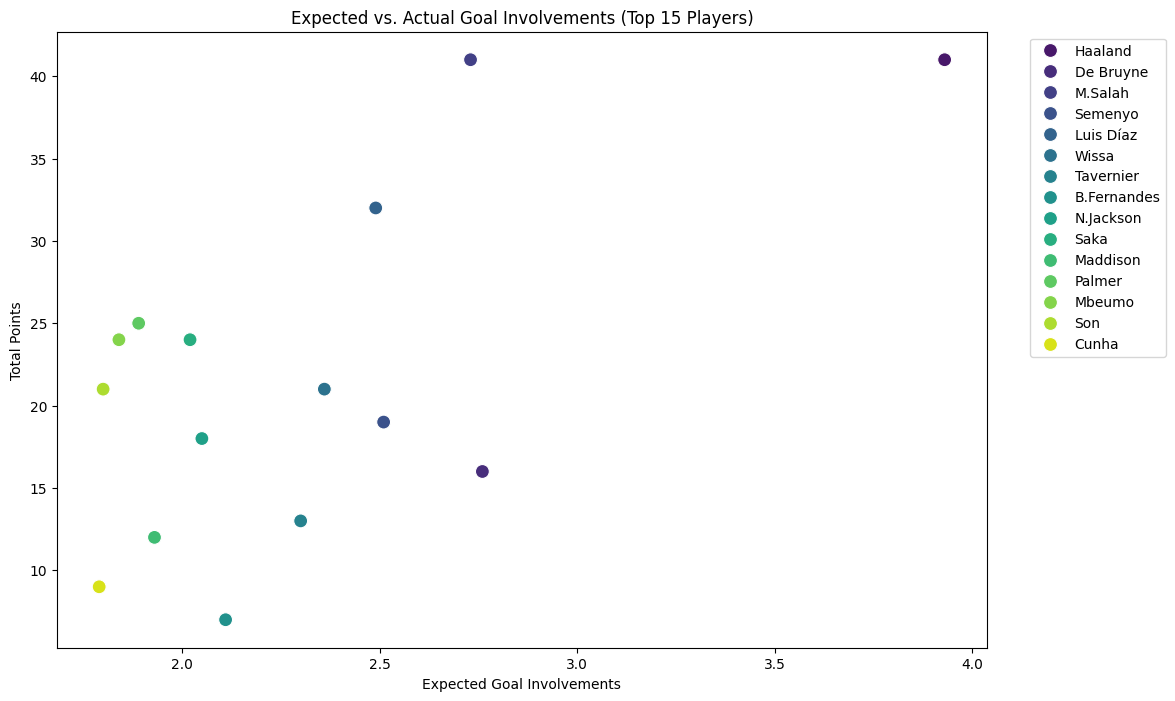

In [165]:
# اختيار أول 15 لاعب بناءً على معيار معين، مثل أعلى `expected_goal_involvements`
top_15_players = df.nlargest(15, 'expected_goal_involvements')

# إنشاء الرسم البياني
plt.figure(figsize=(12, 8))
sns.scatterplot(x='expected_goal_involvements', y='total_points', hue='web_name', 
                data=top_15_players, palette='viridis', s=100, edgecolor='w')

# تخصيص العنوان
plt.title('Expected vs. Actual Goal Involvements (Top 15 Players)')
plt.xlabel('Expected Goal Involvements')
plt.ylabel('Total Points')

# عرض الرسم البياني
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

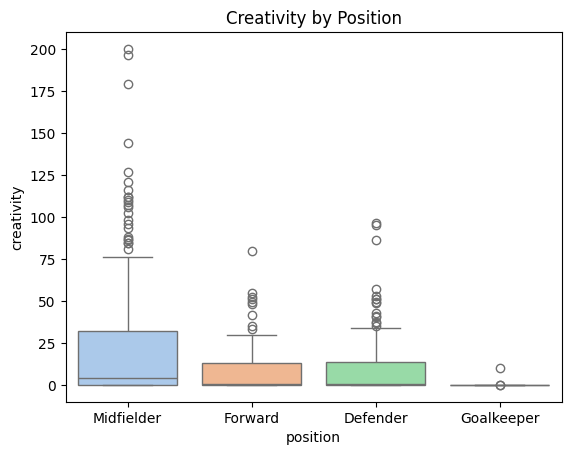

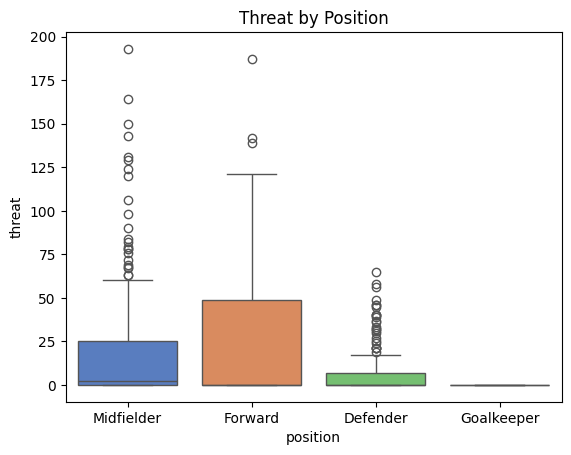

In [167]:
sns.boxplot(x='position', y='creativity', data=df, palette='pastel')
plt.title('Creativity by Position')
plt.show()

sns.boxplot(x='position', y='threat', data=df, palette='muted')
plt.title('Threat by Position')
plt.show()


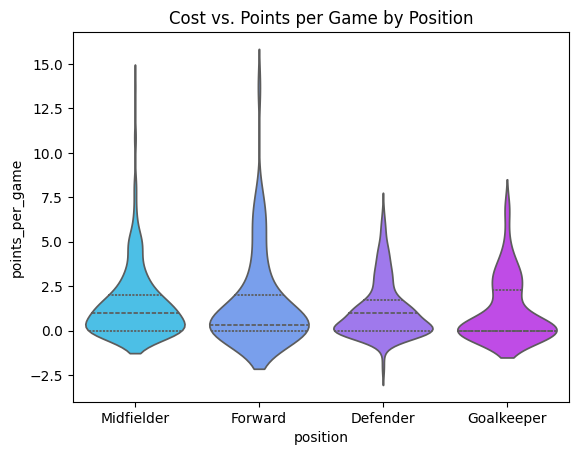

In [169]:
sns.violinplot(x='position', y='points_per_game', data=df, inner='quartile', palette='cool')
plt.title('Cost vs. Points per Game by Position')
plt.show()


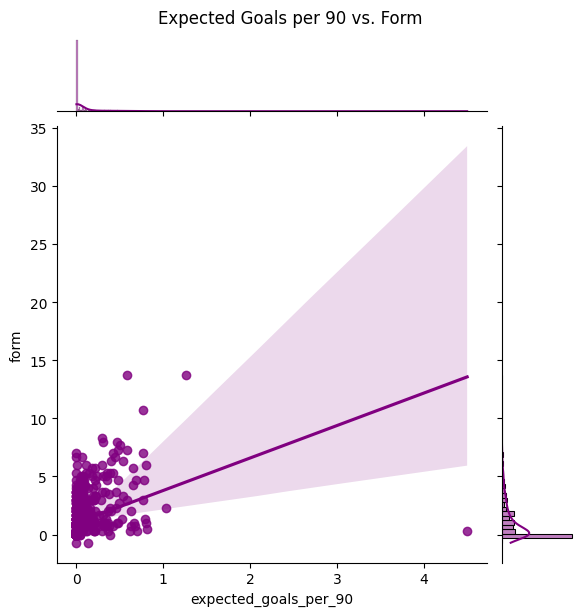

In [171]:
sns.jointplot(x='expected_goals_per_90', y='form', data=df, kind='reg', color='purple')
plt.suptitle('Expected Goals per 90 vs. Form', y=1.02)
plt.show()


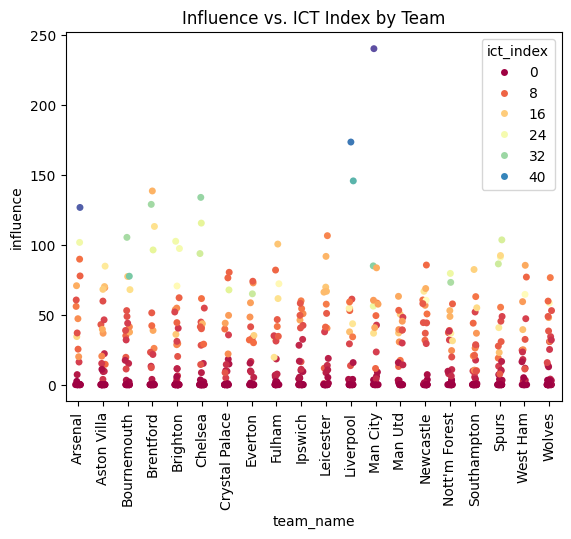

In [173]:
sns.stripplot(x='team_name', y='influence', hue='ict_index', data=df, jitter=True, palette='Spectral')
plt.title('Influence vs. ICT Index by Team')
plt.xticks(rotation=90)
plt.show()
